# EXTRACT FEATURE (LIBROSA)

In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd

from os import path
from pathlib import Path

In [2]:
# #PATH

path_info = "F:/178/Tugas Akhir/dataset/annotations/"
path_to_fitur = "F:/178/Tugas Akhir/dataset/coba fitur/"
path_to_file = "F:/178/Tugas Akhir/dataset/clips_45sec_wav/"
path_to_experiment ="F:/178/Tugas Akhir/dataset/experiment/"

In [3]:
# Song Info

filename = "songs_info.csv"
info = pd.read_csv(path_info + filename)
info.head()

,song_id,file_name,Artist,Song title,start of the segment (min.sec),end of the segment (min.sec),Genre,Mediaeval 2013 set
0,2,\t2.mp3,The New Mystikal Troubadours\t,\tTonight A Lonely Century\t,0.48,1.33,\tBlues\t,development
1,3,\t3.mp3,Kevin MacLeod\t,\tDD Groove\t,0.36,1.21,\tBlues\t,evaluation
2,4,\t4.mp3,Kevin MacLeod\t,\tSlow Burn\t,1.29,2.14,\tBlues\t,development
3,5,\t5.mp3,My Bubba & Mi\t,\tNothing Much\t,0.36,1.21,\tBlues\t,development
4,7,\t7.mp3,Kevin MacLeod\t,\tHustle\t,0.20,1.05,\tBlues\t,development


In [136]:
print(info['Mediaeval 2013 set'].value_counts(dropna=False))

development    619
evaluation     125
Name: Mediaeval 2013 set, dtype: int64


In [4]:
song_file = info['song_id'].to_list()
# song_file

In [9]:
# #MFCC
def mfcc(y,sr,file):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) #13 is default dimension frame 512
    mfcc_np = np.asarray(mfcc)
    mfcc_to_csv = pd.DataFrame(mfcc)
    mfcc_to_csv.to_csv(path_to_fitur+file+"/mfcc.csv", index=False, header=False)
    return mfcc

# #CHROMA
def chroma(y,sr,file):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=24)
    chroma_to_csv = pd.DataFrame(chroma)
    chroma_to_csv.to_csv(path_to_fitur+file+"/chroma.csv", index=False, header=False)
    return chroma

# #TIMBRE // ZERO CROSSING 
def zc(y,sr,file):
    zc = librosa.feature.zero_crossing_rate(y) #1 is default dimension 512 frame
    zc_to_csv = pd.DataFrame(zc)
    zc_to_csv.to_csv(path_to_fitur+file+"/zc.csv", index=False, header=False)
    return zc


# #TIMBRE // FLUX 
def flux(y,sr,file):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr) #1 is default dimension 512 frame
    flux_to_csv = pd.DataFrame(onset_env)
    flux_to_csv.to_csv(path_to_fitur+file+"/flux.csv", index=False, header=False)
    return onset_env

# #TIMBRE // CENTROID 
def cent(y,sr,file):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    cent_to_csv = pd.DataFrame(cent)
    cent_to_csv.to_csv(path_to_fitur+file+"/cent.csv", index=False, header=False)
    return cent

# #TIMBRE // ROLLOFF
def rollof(y,sr,file):
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) #1 is default dimension 512 frame
    rolloff_to_csv = pd.DataFrame(rolloff)
    rolloff_to_csv.to_csv(path_to_fitur+file+"/rolloff.csv")
    return rolloff

# #SCF and SFM 

In [6]:
# def load(file, start):
#     
    
#     return y, sr

In [7]:
def fitur(file):
    #load file
    check = Path(path_to_file+file+".wav")
    if check.is_file():
        # file exists
        paths = path_to_file+file+".mp3"
        
    y, sr = librosa.load(paths, offset=start, duration=45.0,sr=22050,mono=False) #load 45 and with same freq

        
#     content = rollof(y,sr,file)
#     content = cent(y,sr,file) # CENTROID
#     content = flux(y,sr,file) #FLUX
#     content = zc(y,sr,file) #ZC
#     content = chroma(y,sr,file) #chroma
    content = mfcc(y,sr,file) #mfcc

    return content

In [8]:
def matrix_form(fiture):
    print("Bentuk matrix :",fiture.shape) # 45 * SR // frame
    print("Nilai Max matrix :",fiture.max())
    print("Nilai Min matrix :",fiture.min())
    print("\n")

In [10]:
for val in song_file:
    # make dir
    try:  
        os.mkdir(path_to_fitur+str(val))
    except OSError:  
        print ("Creation of the directory %s failed" % path_to_fitur)
    else:  
        print ("Successfully created the directory %s " % path_to_fitur)
    
    
    fiture = fitur(str(val))
    matrix_form(fiture)

# Manual

In [8]:
## MFCC

# import numpy
# import scipy.io.wavfile
# from scipy.fftpack import dct
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

In [6]:
# sample_rate, signal = scipy.io.wavfile.read("C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/2.wav")  # File assumed to be in the same directory
# signal = signal[0:int(45 * sample_rate)]  # Keep the first 45 seconds

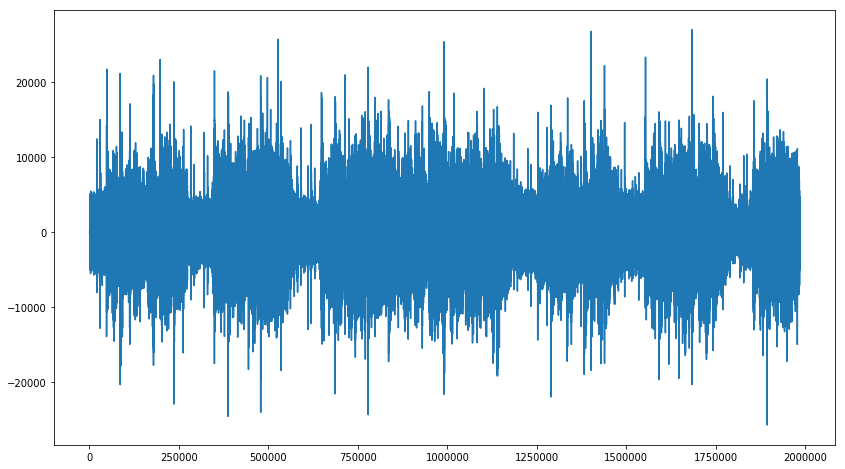

In [10]:
# plt.figure(figsize=(14, 8))

# # plt.ylabel('Hz')
# # plt.xlabel('TIme')
# plt.plot(signal)

In [11]:
# pre_emphasis = 0.97
# emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

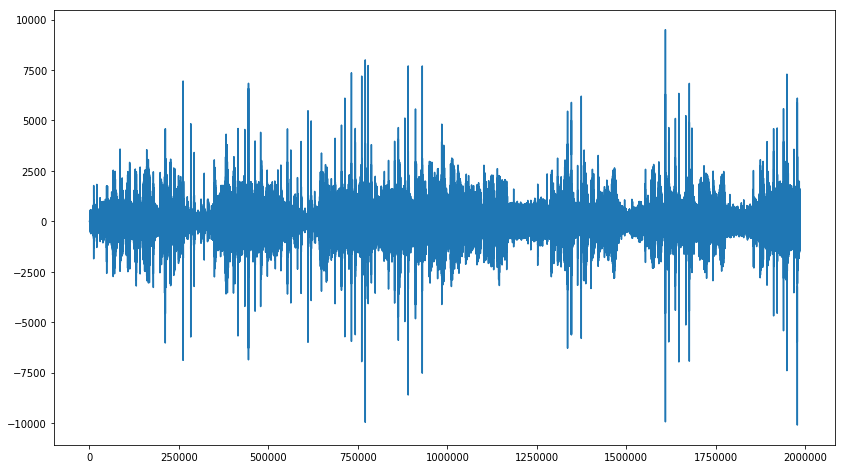

In [12]:
# plt.figure(figsize=(14, 8))

# # plt.ylabel('Hz')
# # plt.xlabel('TIme')
# plt.plot(emphasized_signal)

In [3]:
frame_size = 0.0232
frame_stride = 0.01
NFFT = 512
nfilt = 40
num_ceps = 13

In [24]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [25]:
frames *= numpy.hamming(frame_length)

In [26]:
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [27]:
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [6]:
plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
# plt.xlabel('TIme')
plt.specgram(x=signal, NFFT=NFFT, Fs=sample_rate, Fc=0, detrend=mlab.detrend_none,
         window=mlab.window_hanning, noverlap=128,
         cmap=None, xextent=None, pad_to=None, sides='default',
         scale_by_freq=None, mode='default', scale='default',
         **kwargs)